In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd

In [16]:
from sklearn.datasets import fetch_california_housing

California_H = fetch_california_housing()

California_H

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [17]:
df = pd.DataFrame(data=California_H.data, columns=California_H.feature_names)
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [18]:
Xh = df[['HouseAge', 'AveRooms', 'AveBedrms', 'Population']]

Xh = Xh.to_numpy()

yh = df['MedInc'].to_numpy()

label = ['HouseAge', 'AveRooms', 'AveBedrms', 'Population']

Xh.shape

(20640, 4)

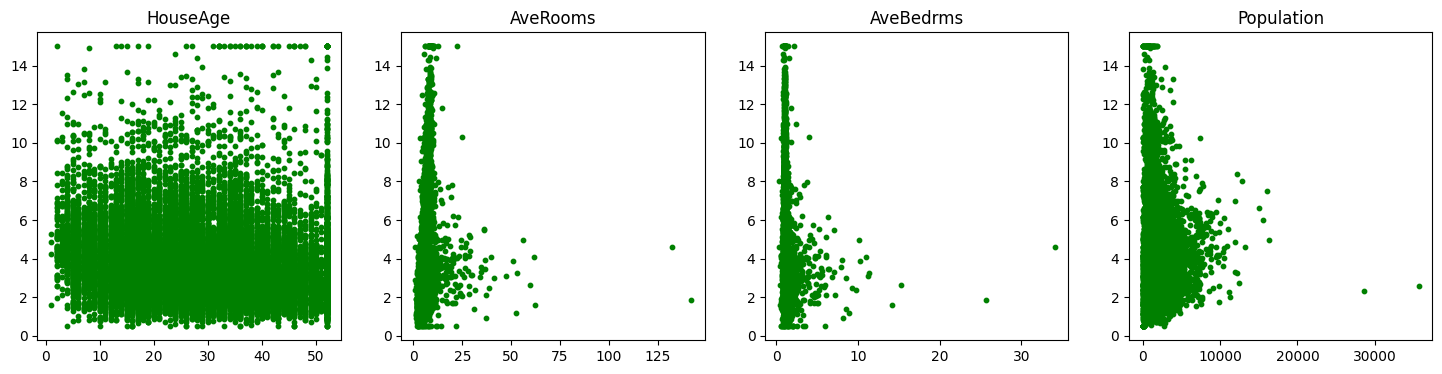

In [10]:
fig, ax = plt.subplots(1, 4, figsize = (18, 4))

for i in range(Xh.shape[1]):
  ax[i].scatter(Xh[:, i], yh, color = 'green', s=10)
  ax[i].set_title(label[i])

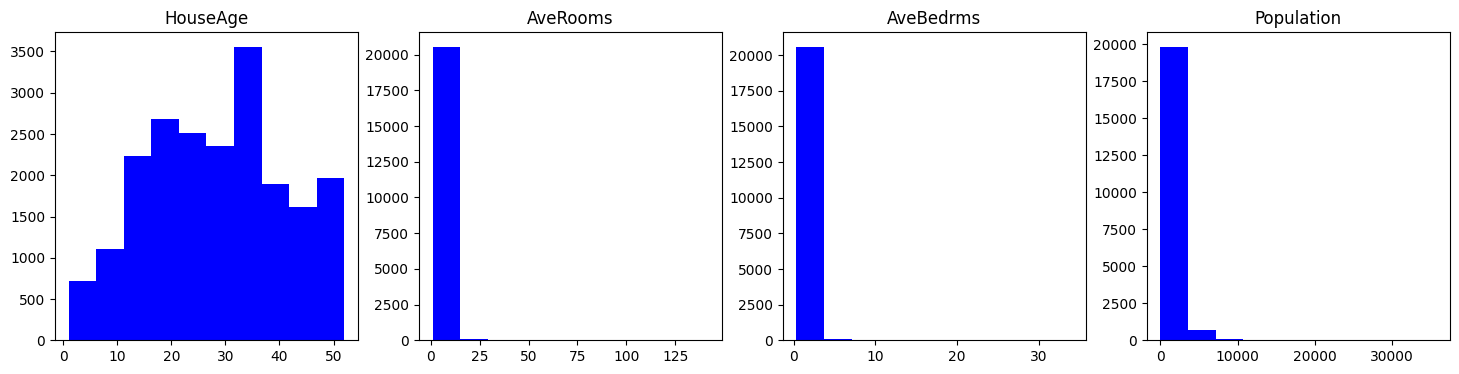

In [11]:
fig, ax = plt.subplots(1, 4, figsize = (18, 4))

for i in range(Xh.shape[1]):
  ax[i].hist(Xh[:, i], color = 'blue')
  ax[i].set_title(label[i])

Limpiando un poco eliminando los 4 valores más altos de Avebedrms

In [20]:
highest_values = df['AveBedrms'].nlargest(4)
df2 = df[~df['AveBedrms'].isin(highest_values)]

In [21]:
Xh = df2[['HouseAge', 'AveRooms', 'AveBedrms', 'Population']]

Xh = Xh.to_numpy()

yh = df2['MedInc'].to_numpy()

label = ['HouseAge', 'AveRooms', 'AveBedrms', 'Population']

Xh.shape

(20636, 4)

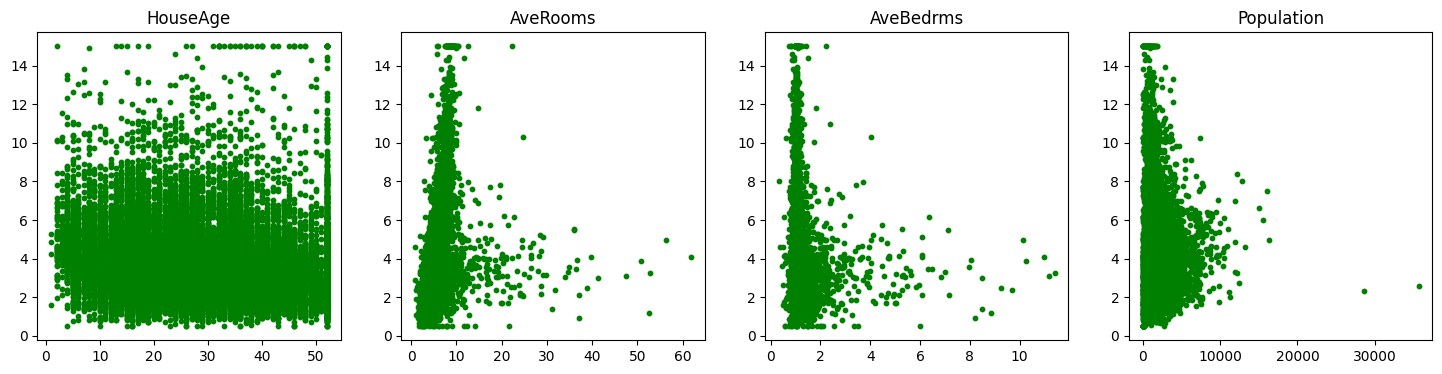

In [22]:
fig, ax = plt.subplots(1, 4, figsize = (18, 4))

for i in range(Xh.shape[1]):
  ax[i].scatter(Xh[:, i], yh, color = 'green', s=10)
  ax[i].set_title(label[i])

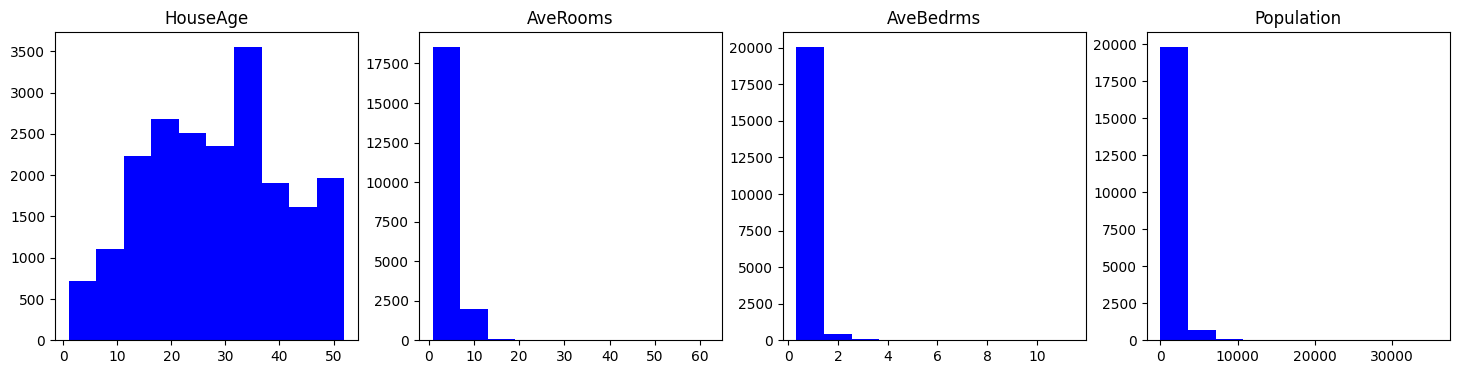

In [23]:
fig, ax = plt.subplots(1, 4, figsize = (18, 4))

for i in range(Xh.shape[1]):
  ax[i].hist(Xh[:, i], color = 'blue')
  ax[i].set_title(label[i])

In [24]:
scaler = StandardScaler()

Xh_norm = scaler.fit_transform(Xh)

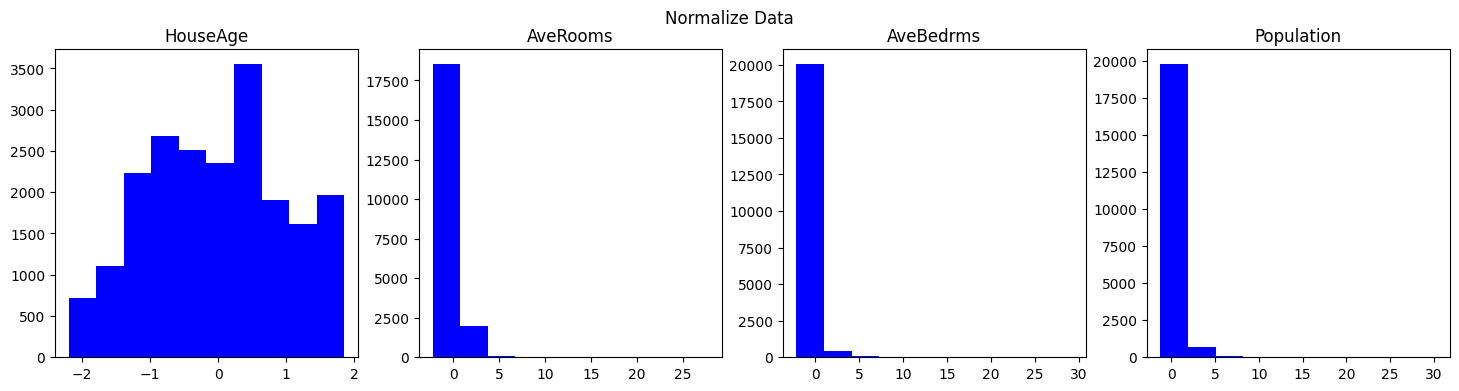

In [25]:
fig, ax = plt.subplots(1, 4, figsize = (18, 4))

fig.suptitle('Normalize Data')
for i in range(Xh_norm.shape[1]):
  ax[i].hist(Xh_norm[:, i], color = 'blue')
  ax[i].set_title(label[i])

In [44]:
sgdr = SGDRegressor(max_iter=100, learning_rate='constant', eta0=0.005)
sgdr.fit(Xh_norm, yh)
print(f"numero de iteraciones: {sgdr.n_iter_}, numero de pesos: {sgdr.t_}")

numero de iteraciones: 9, numero de pesos: 185725.0


In [45]:
w0 = sgdr.intercept_
ws = sgdr.coef_

ws

array([ 0.07986283,  2.11336467, -1.91824032, -0.02547791])

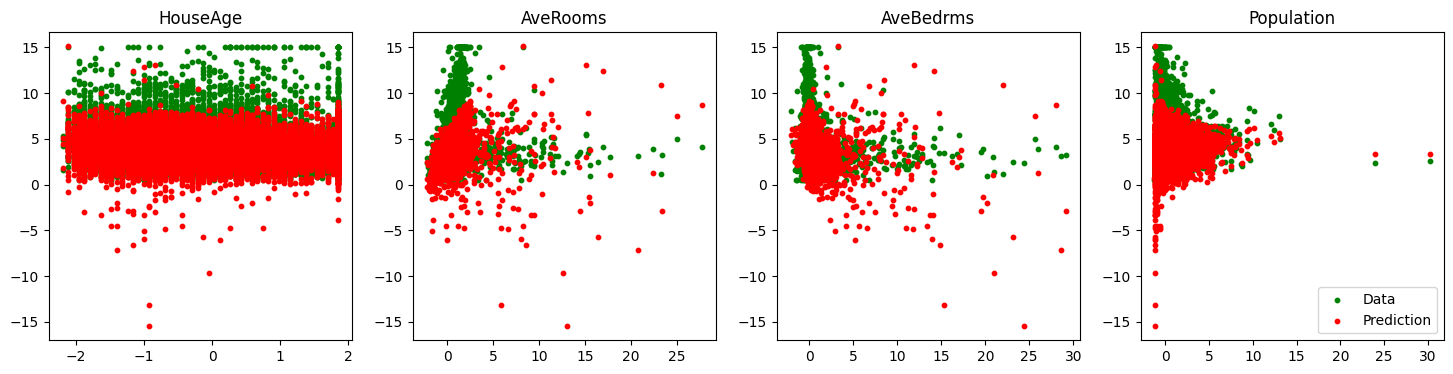

In [46]:
yp = w0[0]

for i in range(Xh_norm.shape[1]):
  yp += Xh_norm[:,i]*ws[i]


fig, ax = plt.subplots(1, 4, figsize = (18, 4))

for i in range(Xh.shape[1]):
  ax[i].scatter(Xh_norm[:, i], yh, color = 'green', s=10, label = 'Data')
  ax[i].scatter(Xh_norm[:, i], yp, color = 'red', s=10, label = 'Prediction')
  ax[i].set_title(label[i])

ax[3].legend(loc = 4);

### Usando librerías

In [43]:
X_train, X_test, y_train, y_test = train_test_split(Xh_norm, yh, test_size=0.30, random_state=42)

In [47]:
sgdr = SGDRegressor(max_iter=100, loss="squared_error",learning_rate='constant', eta0=0.01,penalty=None)
sgdr.fit(X_train, y_train)
print(f"number of iterations completed: {sgdr.n_iter_}, number of weight updates: {sgdr.t_}")

number of iterations completed: 11, number of weight updates: 158896.0


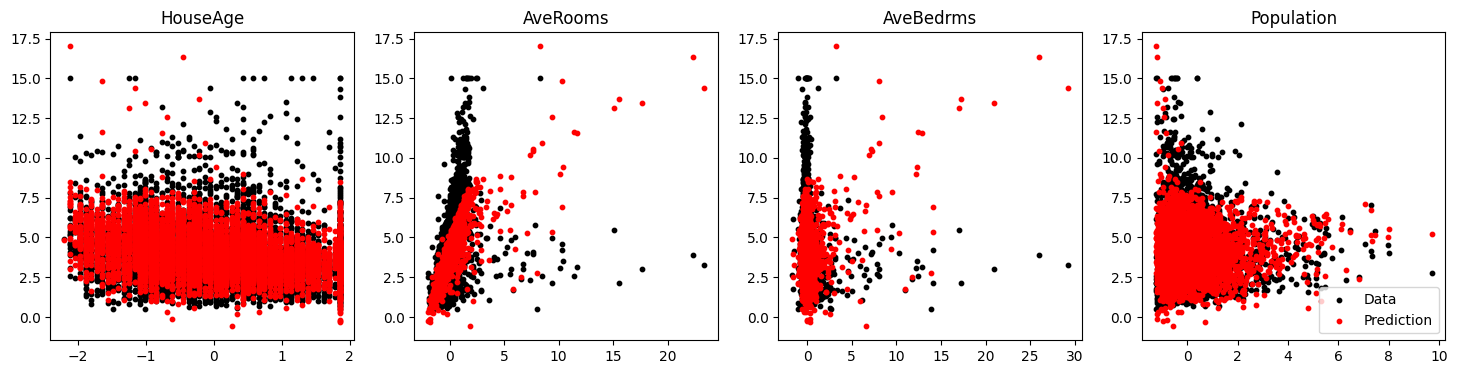

In [48]:
w0_norm = sgdr.intercept_
w_norm = sgdr.coef_

#predict target using normalized features
yp = w0_norm[0]
for i in range(len(w_norm)):
  yp+=w_norm[i]*X_test[:,i]


fig, ax = plt.subplots(1, 4, figsize = (18, 4))


for i in range(X_test.shape[1]):
  ax[i].scatter(X_test[:, i], y_test, color = 'black', s=10, label = 'Data')
  ax[i].scatter(X_test[:, i], yp, color = 'red', s=10, label = 'Prediction')
  ax[i].set_title(label[i])

ax[3].legend(loc = 4);

In [49]:
sgdr.score(X_test, y_test)

0.48119786532465136

### Keras

In [50]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD

np.random.seed(2)
model = Sequential()

In [51]:
input_dim = 4
output_dim = 1
model.add(Dense(output_dim, input_dim=input_dim, activation='linear'))
sgd = SGD(learning_rate=0.01)
model.compile(loss='mse', optimizer=sgd)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 5         
                                                                 
Total params: 5 (20.00 Byte)
Trainable params: 5 (20.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [52]:
num_epochs = 100
batch_size =X_train.shape[0]
history = model.fit(X_train, y_train, epochs=num_epochs, batch_size=batch_size)

Epoch 1/100
1/1 [==============================] - 1s 750ms/step - loss: 18.6287
Epoch 2/100
1/1 [==============================] - 0s 22ms/step - loss: 17.9911
Epoch 3/100
1/1 [==============================] - 0s 19ms/step - loss: 17.3792
Epoch 4/100
1/1 [==============================] - 0s 16ms/step - loss: 16.7920
Epoch 5/100
1/1 [==============================] - 0s 18ms/step - loss: 16.2285
Epoch 6/100
1/1 [==============================] - 0s 19ms/step - loss: 15.6876
Epoch 7/100
1/1 [==============================] - 0s 20ms/step - loss: 15.1684
Epoch 8/100
1/1 [==============================] - 0s 32ms/step - loss: 14.6701
Epoch 9/100
1/1 [==============================] - 0s 16ms/step - loss: 14.1916
Epoch 10/100
1/1 [==============================] - 0s 19ms/step - loss: 13.7323
Epoch 11/100
1/1 [==============================] - 0s 21ms/step - loss: 13.2913
Epoch 12/100
1/1 [==============================] - 0s 24ms/step - loss: 12.8678
Epoch 13/100
1/1 [==================

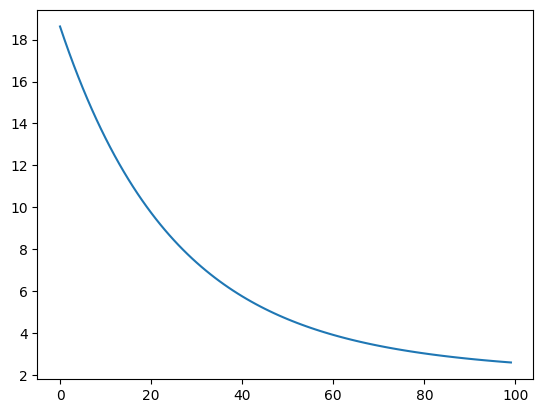

In [53]:
history_df = pd.DataFrame(history.history)
# use Pandas native plot method
history_df['loss'].plot();

In [54]:
capas = model.layers[0]

w, s = capas.get_weights()

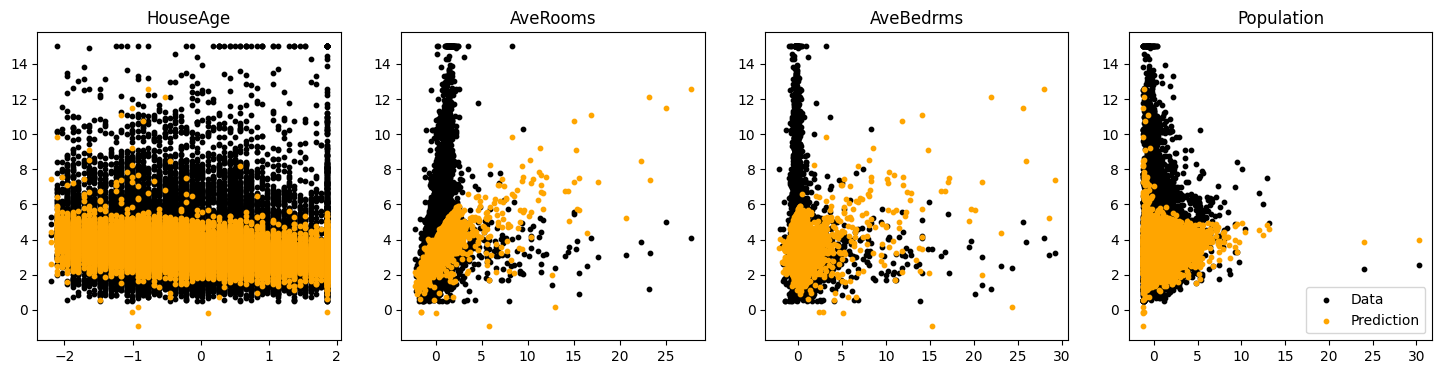

In [57]:
yp = s[0]

for i in range(Xh_norm.shape[1]):
  yp += Xh_norm[:,i]*w[i]


fig, ax = plt.subplots(1, 4, figsize = (18, 4))

for i in range(Xh.shape[1]):
  ax[i].scatter(Xh_norm[:, i], yh, color = 'black', s=10, label = 'Data')
  ax[i].scatter(Xh_norm[:, i], yp, color = 'orange', s=10, label = 'Prediction')
  ax[i].set_title(label[i])

ax[3].legend(loc = 4);

In [58]:
history2 = model.fit(X_test, y_test, epochs=num_epochs, batch_size=batch_size, verbose=1,
                     validation_data = (X_test, y_test))

Epoch 1/100
1/1 [==============================] - 0s 475ms/step - loss: 2.4562 - val_loss: 2.4406
Epoch 2/100
1/1 [==============================] - 0s 55ms/step - loss: 2.4406 - val_loss: 2.4255
Epoch 3/100
1/1 [==============================] - 0s 89ms/step - loss: 2.4255 - val_loss: 2.4108
Epoch 4/100
1/1 [==============================] - 0s 74ms/step - loss: 2.4108 - val_loss: 2.3965
Epoch 5/100
1/1 [==============================] - 0s 82ms/step - loss: 2.3965 - val_loss: 2.3827
Epoch 6/100
1/1 [==============================] - 0s 104ms/step - loss: 2.3827 - val_loss: 2.3692
Epoch 7/100
1/1 [==============================] - 0s 87ms/step - loss: 2.3692 - val_loss: 2.3561
Epoch 8/100
1/1 [==============================] - 0s 70ms/step - loss: 2.3561 - val_loss: 2.3433
Epoch 9/100
1/1 [==============================] - 0s 79ms/step - loss: 2.3433 - val_loss: 2.3309
Epoch 10/100
1/1 [==============================] - 0s 63ms/step - loss: 2.3309 - val_loss: 2.3188
Epoch 11/100
1/1 

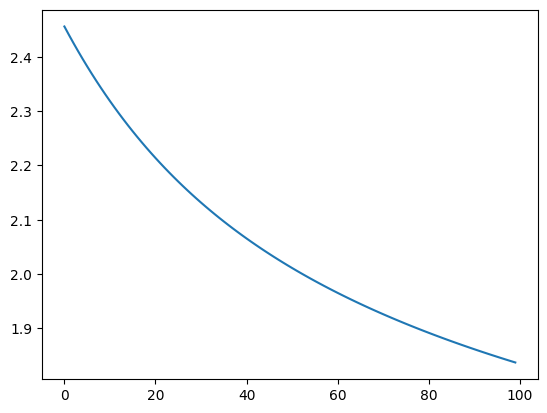

In [59]:
history_df = pd.DataFrame(history2.history)
# use Pandas native plot method
history_df['loss'].plot();

In [60]:
capas = model.layers[0]

w, s = capas.get_weights()

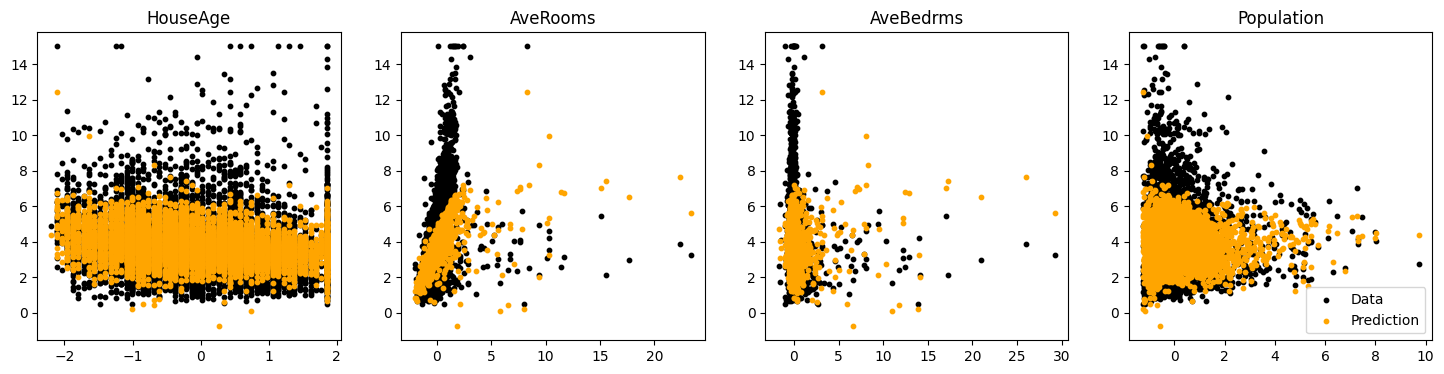

In [61]:
yp = s[0]

for i in range(Xh_norm.shape[1]):
  yp += X_test[:,i]*w[i]


fig, ax = plt.subplots(1, 4, figsize = (18, 4))

for i in range(Xh.shape[1]):
  ax[i].scatter(X_test[:, i], y_test, color = 'black', s=10, label = 'Data')
  ax[i].scatter(X_test[:, i], yp, color = 'orange', s=10, label = 'Prediction')
  ax[i].set_title(label[i])

ax[3].legend(loc = 4);